In [1]:
import pandas as pd
import numpy as np
import functools
import operator
import os 
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum
import re
from datetime import datetime, timedelta
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage import measure
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import random
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
df=pd.DataFrame({
'acct_num': [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3],
'score': [np.nan, np.nan, 300, 250, np.nan, 275, 400, 450, 9998, np.nan, np.nan],
'order_date': ['2021-05-11 20:29:22.656','2021-04-15 10:15:20.444',
               '2021-03-18 03:29:22.400', '2021-02-21 22:05:22.399',
               '2021-05-05 12:01:19.699','2021-04-19 18:16:22.493',
               '2021-04-19 05:12:12.837', '2021-04-19 04:22:19.199',
               '2021-04-19 03:58:11.121', '2021-02-01 14:29:22.656',
               '2021-03-08 13:03:22.653']})
##df=df.dropna()
##df

grouped2=df.groupby('acct_num').groups
for group in grouped2:
    print(group)
    filter=(df['acct_num']==group) & (df['score']!=9998)
    max_score=df[filter]['score'].max()
    max_order_date=df[filter]['order_date'].max()
    print(max_score,max_order_date)
print(grouped2)

grouped2=df.groupby('acct_num')[['score','order_date']].agg({'max'})
print(grouped2)

1
300.0 2021-05-11 20:29:22.656
2
450.0 2021-05-05 12:01:19.699
3
nan 2021-03-08 13:03:22.653
{1: [0, 1, 2, 3], 2: [4, 5, 6, 7, 8], 3: [9, 10]}
           score               order_date
             max                      max
acct_num                                 
1          300.0  2021-05-11 20:29:22.656
2         9998.0  2021-05-05 12:01:19.699
3            NaN  2021-03-08 13:03:22.653


In [17]:
regular_list = []
def transform(nested_list):
    for ele in nested_list:
        if type(ele) is list:
            regular_list.append(ele)
        else:
            regular_list.append([ele])
    return regular_list

L = [[[1, 2, 3], [4, 5]], 6]

result = transform(L)
print(result)
#print(np.ndarray.flatten(L))

[[[1, 2, 3], [4, 5]], [6]]


In [18]:
class VirufyAugmenter:
    def __init__(self, paths):
        assert self.path_exists(paths)
        self.paths=paths
        
    def path_exists(self,paths):
        result=False
        for path in paths:
            result=os.path.isdir(path)
            if result==False:
                break
        return result
    
paths=["c:\\"]
obj=VirufyAugmenter(paths)
print(obj)

In [19]:
start_time=datetime(
    year=2021,
    month=5,
    day=27,
    hour=10,
    minute=24,
    microsecond=0)

end_time=datetime.now()
delta=(end_time-start_time)

seconds_in_day = 24 * 60 * 60
seconds_in_hour= 1 * 60 * 60

elapsed_seconds=delta.days * seconds_in_day + delta.seconds

days= int(elapsed_seconds/seconds_in_day)
hours=  int(elapsed_seconds/seconds_in_hour)
minutes= int((elapsed_seconds - (hours*seconds_in_hour))/60)

print("Day {} or Hours {} Minutes {}".format(days,hours,minutes))


Day 45 or Hours 1080 Minutes 17


In [20]:
data=(
        (" apple ","red "),
        (" banana "," yellow "),
        (" banana "," green "),
        (" apple "," green "),
        (" cherry "," red ")
    )
headers= (" fruit ", " colour ") 

df=pd.DataFrame(data,columns=headers)
print(df)
a_dict=df.to_dict()
for key,item in a_dict.items():
    print(key,item)
    for i in np.arange(len(item)):
        print(item[i])
        
        
dct = dict((y, x) for x, y in data)        
print(dct)


     fruit    colour 
0    apple       red 
1   banana    yellow 
2   banana     green 
3    apple     green 
4   cherry       red 
 fruit  {0: ' apple ', 1: ' banana ', 2: ' banana ', 3: ' apple ', 4: ' cherry '}
 apple 
 banana 
 banana 
 apple 
 cherry 
 colour  {0: 'red ', 1: ' yellow ', 2: ' green ', 3: ' green ', 4: ' red '}
red 
 yellow 
 green 
 green 
 red 
{'red ': ' apple ', ' yellow ': ' banana ', ' green ': ' apple ', ' red ': ' cherry '}


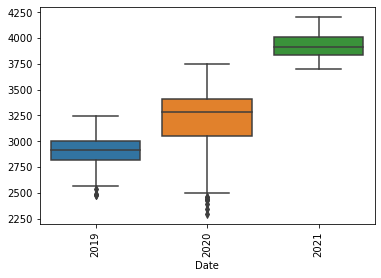

In [21]:
df=pd.read_csv('sp500.csv',parse_dates=['Date'],index_col='Date')
grouped=df.groupby(pd.Grouper(level=0,freq='D'))['Open'].mean()

sns.boxplot(x=grouped.index.year, y=grouped.values,
data=grouped)
plt.xticks(rotation=90)
plt.show()


In [23]:
from itertools import chain
print("Chain is a function that takes a series of iterables and returns one iterable. It groups all the iterables together and produces a single iterable as output.")
data=[1,2,3,4]
cc = chain(*(range(2000*k+10*(k-1), 2010*k) for k in range(1,len(data)//2000)))
#data = data.drop(labels=cc, axis=0)
print(list(cc))

Chain is a function that takes a series of iterables and returns one iterable. It groups all the iterables together and produces a single iterable as output.
[]


  col1  col2
0    A     1
1    A     2
2    A     3
3    B     4
4    B     5
5    B     6
6    C     7
7    C     7
        0    1    2    3    4    5    6    7
col1                                        
A     1.0  2.0  3.0  0.0  0.0  0.0  0.0  0.0
B     0.0  0.0  0.0  4.0  5.0  6.0  0.0  0.0
C     0.0  0.0  0.0  0.0  0.0  0.0  7.0  7.0


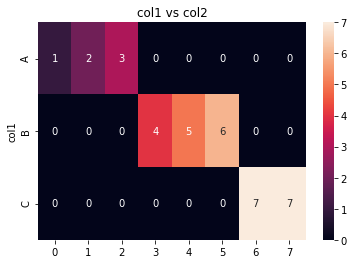

In [273]:
d = {'col1': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C'], 'col2': [1, 2, 3, 4, 5, 6, 7, 7]}
df = pd.DataFrame(data=d)
print(df)
print(df.pivot_table(index='col1',columns=df.index, values='col2').fillna(0))

fp=df.pivot_table(index='col1',columns=df.index, values='col2').fillna(0)
sns.heatmap(fp,annot=True)
plt.title('col1 vs col2')
plt.show()


In [10]:
index= pd.date_range(start='2021-1-1',periods=52,freq='W')
print(index)

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
               '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'],
              dtype='datetime64[ns]', freq='W-SUN')


In [13]:
    class Items(Enum):
        review = 4
        enter = 5
        help = 2
        hello = 9
        happy = 1

    values = { 4: "review",
        5 : "enter",
        2 : "help",
        9 : "hello",
        1 : "happy",}
    print([values[key] for key in sorted(values.keys())])

['happy', 'help', 'review', 'enter', 'hello']


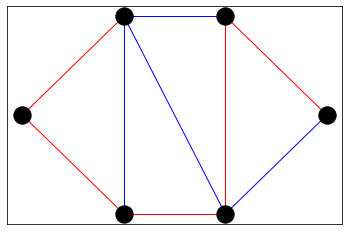

In [25]:
import networkx as nx

class Node(object):
    def __init__(self, data):
        self.data = data

#G = nx.Graph()
#G.add_nodes_from([Node(1), Node(2), Node(3), Node(4)])
#G.add_edge(1, 2, data='some data')
#G.add_edge(2, 3, data='some more data')
#G.add_edge(2, 4, data='yet more data')#

blue_edges = [('B', 'C'), ('B', 'D'), ('B', 'E'), ('E', 'F')]
red_edges = [('A', 'B'), ('A', 'C'), ('C', 'E'), ('D', 'E'), ('D', 'F')]

G=nx.Graph() #define G
G.add_edges_from(blue_edges)
G.add_edges_from(red_edges)

pos = {'A':(0,0), 'B':(1,1), 'C':(1,-1), 'D':(2,1), 'E':(2,-1), 'F':(3,0)}

nx.draw_networkx(G, pos=pos, edgelist = [], node_color = 'k')
nx.draw_networkx(G, pos=pos, nodelist = [], edgelist = blue_edges, edge_color = 'b')
nx.draw_networkx(G, pos=pos, nodelist = [], edgelist = red_edges, edge_color = 'r')

In [37]:
data=['Job Id: 49361.tyrone-cluster', 'resources_used.cput = 14:32:14', 'resources_used.mem = 13955852kb', 'resources_used.vmem = 14199016kb', 'resources_used.walltime = 05:23:02', 'job_state = R', 'queue = qp32', 'Job Id: 49362.tyrone-cluster', 'job_state = Q', 'queue = batch', 'comment = Not Running: Queue not an execution queue.', 'Job Id: 49395.tyrone-cluster', 'resources_used.cput = 31:20:32', 'resources_used.mem = 19179712kb', 'resources_used.vmem = 158305072kb', 'resources_used.walltime = 01:57:34', 'job_state = R', 'queue = idqueue', 'Job Id: 49396.tyrone-cluster', 'resources_used.cput = 46:26:45', 'resources_used.mem = 5347092kb', 'resources_used.vmem = 7588024kb', 'resources_used.walltime = 01:44:50', 'job_state = R', 'queue = qp32', 'Job Id: 49408.tyrone-cluster', 'job_state = Q', 'queue = qp32']
key_value_pairs=[item.split("=") for item in data]
#print(key_value_pairs)
my_dict={}
for item in key_value_pairs:
    if len(item)==2:
        my_dict[item[0]]=item[1]
        
print(my_dict.keys(),my_dict.values())        

dict_keys(['resources_used.cput ', 'resources_used.mem ', 'resources_used.vmem ', 'resources_used.walltime ', 'job_state ', 'queue ', 'comment ']) dict_values([' 46:26:45', ' 5347092kb', ' 7588024kb', ' 01:44:50', ' Q', ' qp32', ' Not Running: Queue not an execution queue.'])


In [58]:
EECTION_DICT = {
    "accounting+finance": "acc",
    "admin / office": "ofc",
    "arch / engineering": "egr",
    'art / media / design': 'med',
    'biotech / science': 'sci',
    'business / mgmt': 'bus'}

def foo(**args):
    for key,item in args.items():
        print(key, item)
        
foo(**EECTION_DICT)    

accounting+finance acc
admin / office ofc
arch / engineering egr
art / media / design med
biotech / science sci
business / mgmt bus


In [62]:
x = ['one', 'two', 'four']
y = ['two', 'three', 'five']
z = ['one', 'three', 'four']
result=set.union(set(x),set(y))
result=set.union(result,set(z))
print(result)

{'four', 'two', 'one', 'three', 'five'}


<AxesSubplot:title={'center':'Population'}, xlabel='Region'>

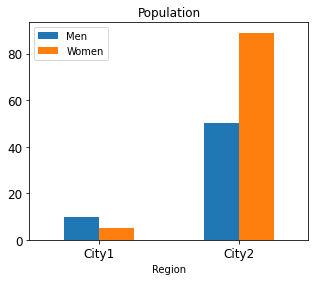

In [81]:
Region=['City1','City2']
Men=[10,50]
Women=[5,89]
df=pd.DataFrame({'Region':Region,'Men':Men,'Women':Women})
df.plot.bar(x='Region',y=['Men','Women'], rot=0, title='Population', figsize=(5,4), fontsize=12)

In [6]:
myval="constructor: function(some, parameters, here) {"
cons,args=re.search(r"(\w*):\s*function\((?:(\w+)(?:,\s)?)*\)", myval).groups()
print(cons,args)

constructor here


In [68]:
a = np.array([
 [2, 10  ],
 [3, 120],
 [4, 30 ]
])

b = np.array([
 [1, 10 ],
 [2, 40]
])

index_a=a[:,0]
value_a=a[:,1]
index_b=b[:,0]
value_b=b[:,1]
df=pd.DataFrame({"index":index_a,"a":value_a})
df2=pd.DataFrame({"index":index_b,"b":value_b})
result=pd.merge(df,df2,on="index",how="outer")
result.set_index('index',inplace=True)
result.sort_index(inplace=True)
print(result.to_numpy())

[[ nan  10.]
 [ 10.  40.]
 [120.  nan]
 [ 30.  nan]]


In [81]:
['ret'+str(x) for x in list(range(-120,241,5)) if (x!=0) ]

['ret-120',
 'ret-115',
 'ret-110',
 'ret-105',
 'ret-100',
 'ret-95',
 'ret-90',
 'ret-85',
 'ret-80',
 'ret-75',
 'ret-70',
 'ret-65',
 'ret-60',
 'ret-55',
 'ret-50',
 'ret-45',
 'ret-40',
 'ret-35',
 'ret-30',
 'ret-25',
 'ret-20',
 'ret-15',
 'ret-10',
 'ret-5',
 'ret5',
 'ret10',
 'ret15',
 'ret20',
 'ret25',
 'ret30',
 'ret35',
 'ret40',
 'ret45',
 'ret50',
 'ret55',
 'ret60',
 'ret65',
 'ret70',
 'ret75',
 'ret80',
 'ret85',
 'ret90',
 'ret95',
 'ret100',
 'ret105',
 'ret110',
 'ret115',
 'ret120',
 'ret125',
 'ret130',
 'ret135',
 'ret140',
 'ret145',
 'ret150',
 'ret155',
 'ret160',
 'ret165',
 'ret170',
 'ret175',
 'ret180',
 'ret185',
 'ret190',
 'ret195',
 'ret200',
 'ret205',
 'ret210',
 'ret215',
 'ret220',
 'ret225',
 'ret230',
 'ret235',
 'ret240']

In [40]:
status=['OK'
,'OK'
,'OK'
,'OK'
,'OK'
,'OK'
,'Fail'
,'OK'
,'Fail'
,'OK']
df=pd.DataFrame({'Status':status})
df.reset_index(inplace=True)
print(df)
val=[index for index,item in df.iterrows() if item['Status']=='Fail']

print(val)

   index Status
0      0     OK
1      1     OK
2      2     OK
3      3     OK
4      4     OK
5      5     OK
6      6   Fail
7      7     OK
8      8   Fail
9      9     OK
[6, 8]


In [94]:
mynumber = str(2006601400162797)

result=[]
[result.append(".") if len(result)==10 else result.append(x) for x in mynumber]
print("".join(result))


2006601400.62797


In [103]:
od1 = {0:10, 1:3, 2:7, 3:11, 4:30, 5:15, 6:19, 7:4, 8:3}
#print(od1)
od2=sorted([(key,item) for key,item in od1.items() if key%2==0])

print(od2)

[(0, 10), (2, 7), (4, 30), (6, 19), (8, 3)]


In [127]:
class aDictionary:
    def __init__(self, dict):
        self.dict=dict
    def find(self,searchDict):
        key=list(searchDict.keys())[0]
        value=list(searchDict.values())[0]
        result_list=self.dict["nicknames"]
        return(value in result_list)

data={"nicknames":["Johnny","JSwitch","JB","Tc Johnny","Bardy"]}
dict=aDictionary(data)

print(dict.find({"nicknames":"JB"}))

True


In [206]:
split_format = 'id-id1_id2|id3'

data = {'col1':['a-a1_a2|a3', 'b-b1_b2|b3', 'c-c1_c2|c3', 'd-d1_d2|d3'],
        'col2':[20, 21, 19, 18]}
df = pd.DataFrame(data)
print(df)

symbols=[]
for x in split_format:
    if x.isalnum()==False:
        symbols.append(x)

result=[]
def parseTree(stringlist,symbols,result):
    
    #print("String list",stringlist)
    
    if len(symbols)==0:
        [result.append(x) for x in stringlist]
        return
    token=symbols.pop(0)
    elements=[]
    for item in stringlist:
        elements.append(item.split(token))
        
    flat_list = [item for sublist in elements for item in sublist]        
    parseTree(flat_list,symbols,result)

df2=pd.DataFrame(columns=["id","id1","id2","id3"])
for key, item in df.iterrows():
    symbols2=symbols.copy()
    value=item['col1']
    parseTree([value],symbols2,result)
    #print(result)
    a_series = pd. Series(result, index = df2.columns)
    df2=df2.append(a_series, ignore_index=True)
    result.clear()

df2['col2']=df['col2']    
print(df2)


col_name = re.split('[^0-9a-zA-Z]+',split_format)
df[col_name] = df['col1'].str.split('[^0-9a-zA-Z]+',expand=True)
del df['col1']
print(df)

         col1  col2
0  a-a1_a2|a3    20
1  b-b1_b2|b3    21
2  c-c1_c2|c3    19
3  d-d1_d2|d3    18
  id id1 id2 id3  col2
0  a  a1  a2  a3    20
1  b  b1  b2  b3    21
2  c  c1  c2  c3    19
3  d  d1  d2  d3    18
   col2 id id1 id2 id3
0    20  a  a1  a2  a3
1    21  b  b1  b2  b3
2    19  c  c1  c2  c3
3    18  d  d1  d2  d3


In [208]:
text = 'aa33bbb44'
result=re.findall('\d+',text)
for item in result:
    print(item)

33
44


In [254]:
test = [{u'TopicArn': u'arn:aws:sns:us-east-1:700257:test1'},
  {u'TopicArn': u'arn:aws:sns:us-east-1:700257:test2'},
  {u'TopicArn': u'arn:aws:sns:us-east-1:700257:test3'},
  {u'TopicArn': u'arn:aws:sns:us-east-1:700257:test4'}]

string = 'arn:aws:sns:us-east-1:700257:test4'

result=list(d for d in test if string in d.values())
print(result)
#for item in mylist:
#    print(item)

[{'TopicArn': 'arn:aws:sns:us-east-1:700257:test4'}]


In [267]:
ls = [
[1, 1, 0, 2, 2],
[1, 1, 1, 2, 2, 2],
[0, 1, 0, 0, 0, 2, 0]
]

ls1,ls2=([[y&b for y in x] for x in ls] for b in (1,2))
print(ls1,ls2)
#[[y&2 for y in x] for x in ls]

[[1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]] [[0, 0, 0, 2, 2], [0, 0, 0, 2, 2, 2], [0, 0, 0, 0, 0, 2, 0]]


In [273]:
dictionary= {"apple":[3,5], "banana":[3,3,6], "strawberry":[1,2,4,5,5]}
for key,item in dictionary.items():
    dictionary[key]=set(item)

print(dictionary)

{'apple': {3, 5}, 'banana': {3, 6}, 'strawberry': {1, 2, 4, 5}}


In [305]:
import re

a = "3213>1234<3213>5123<"

p = re.compile('>([0-9]+)<')
data=p.findall(a)

for item in data:
    print(item)

1234
5123


In [323]:

dict={}
index=0
for i in range(26):
    for j in range(26):
        for k in range(26):
            dict[index]=chr(i+97)+chr(j+97)+chr(k+97)
            index+=1
    
for key,item in dict.items():
    print(item)


aaa
aab
aac
aad
aae
aaf
aag
aah
aai
aaj
aak
aal
aam
aan
aao
aap
aaq
aar
aas
aat
aau
aav
aaw
aax
aay
aaz
aba
abb
abc
abd
abe
abf
abg
abh
abi
abj
abk
abl
abm
abn
abo
abp
abq
abr
abs
abt
abu
abv
abw
abx
aby
abz
aca
acb
acc
acd
ace
acf
acg
ach
aci
acj
ack
acl
acm
acn
aco
acp
acq
acr
acs
act
acu
acv
acw
acx
acy
acz
ada
adb
adc
add
ade
adf
adg
adh
adi
adj
adk
adl
adm
adn
ado
adp
adq
adr
ads
adt
adu
adv
adw
adx
ady
adz
aea
aeb
aec
aed
aee
aef
aeg
aeh
aei
aej
aek
ael
aem
aen
aeo
aep
aeq
aer
aes
aet
aeu
aev
aew
aex
aey
aez
afa
afb
afc
afd
afe
aff
afg
afh
afi
afj
afk
afl
afm
afn
afo
afp
afq
afr
afs
aft
afu
afv
afw
afx
afy
afz
aga
agb
agc
agd
age
agf
agg
agh
agi
agj
agk
agl
agm
agn
ago
agp
agq
agr
ags
agt
agu
agv
agw
agx
agy
agz
aha
ahb
ahc
ahd
ahe
ahf
ahg
ahh
ahi
ahj
ahk
ahl
ahm
ahn
aho
ahp
ahq
ahr
ahs
aht
ahu
ahv
ahw
ahx
ahy
ahz
aia
aib
aic
aid
aie
aif
aig
aih
aii
aij
aik
ail
aim
ain
aio
aip
aiq
air
ais
ait
aiu
aiv
aiw
aix
aiy
aiz
aja
ajb
ajc
ajd
aje
ajf
ajg
ajh
aji
ajj
ajk
ajl
ajm
ajn
ajo
ajp


dwm
dwn
dwo
dwp
dwq
dwr
dws
dwt
dwu
dwv
dww
dwx
dwy
dwz
dxa
dxb
dxc
dxd
dxe
dxf
dxg
dxh
dxi
dxj
dxk
dxl
dxm
dxn
dxo
dxp
dxq
dxr
dxs
dxt
dxu
dxv
dxw
dxx
dxy
dxz
dya
dyb
dyc
dyd
dye
dyf
dyg
dyh
dyi
dyj
dyk
dyl
dym
dyn
dyo
dyp
dyq
dyr
dys
dyt
dyu
dyv
dyw
dyx
dyy
dyz
dza
dzb
dzc
dzd
dze
dzf
dzg
dzh
dzi
dzj
dzk
dzl
dzm
dzn
dzo
dzp
dzq
dzr
dzs
dzt
dzu
dzv
dzw
dzx
dzy
dzz
eaa
eab
eac
ead
eae
eaf
eag
eah
eai
eaj
eak
eal
eam
ean
eao
eap
eaq
ear
eas
eat
eau
eav
eaw
eax
eay
eaz
eba
ebb
ebc
ebd
ebe
ebf
ebg
ebh
ebi
ebj
ebk
ebl
ebm
ebn
ebo
ebp
ebq
ebr
ebs
ebt
ebu
ebv
ebw
ebx
eby
ebz
eca
ecb
ecc
ecd
ece
ecf
ecg
ech
eci
ecj
eck
ecl
ecm
ecn
eco
ecp
ecq
ecr
ecs
ect
ecu
ecv
ecw
ecx
ecy
ecz
eda
edb
edc
edd
ede
edf
edg
edh
edi
edj
edk
edl
edm
edn
edo
edp
edq
edr
eds
edt
edu
edv
edw
edx
edy
edz
eea
eeb
eec
eed
eee
eef
eeg
eeh
eei
eej
eek
eel
eem
een
eeo
eep
eeq
eer
ees
eet
eeu
eev
eew
eex
eey
eez
efa
efb
efc
efd
efe
eff
efg
efh
efi
efj
efk
efl
efm
efn
efo
efp
efq
efr
efs
eft
efu
efv
efw
efx
efy
efz
ega
egb


hop
hoq
hor
hos
hot
hou
hov
how
hox
hoy
hoz
hpa
hpb
hpc
hpd
hpe
hpf
hpg
hph
hpi
hpj
hpk
hpl
hpm
hpn
hpo
hpp
hpq
hpr
hps
hpt
hpu
hpv
hpw
hpx
hpy
hpz
hqa
hqb
hqc
hqd
hqe
hqf
hqg
hqh
hqi
hqj
hqk
hql
hqm
hqn
hqo
hqp
hqq
hqr
hqs
hqt
hqu
hqv
hqw
hqx
hqy
hqz
hra
hrb
hrc
hrd
hre
hrf
hrg
hrh
hri
hrj
hrk
hrl
hrm
hrn
hro
hrp
hrq
hrr
hrs
hrt
hru
hrv
hrw
hrx
hry
hrz
hsa
hsb
hsc
hsd
hse
hsf
hsg
hsh
hsi
hsj
hsk
hsl
hsm
hsn
hso
hsp
hsq
hsr
hss
hst
hsu
hsv
hsw
hsx
hsy
hsz
hta
htb
htc
htd
hte
htf
htg
hth
hti
htj
htk
htl
htm
htn
hto
htp
htq
htr
hts
htt
htu
htv
htw
htx
hty
htz
hua
hub
huc
hud
hue
huf
hug
huh
hui
huj
huk
hul
hum
hun
huo
hup
huq
hur
hus
hut
huu
huv
huw
hux
huy
huz
hva
hvb
hvc
hvd
hve
hvf
hvg
hvh
hvi
hvj
hvk
hvl
hvm
hvn
hvo
hvp
hvq
hvr
hvs
hvt
hvu
hvv
hvw
hvx
hvy
hvz
hwa
hwb
hwc
hwd
hwe
hwf
hwg
hwh
hwi
hwj
hwk
hwl
hwm
hwn
hwo
hwp
hwq
hwr
hws
hwt
hwu
hwv
hww
hwx
hwy
hwz
hxa
hxb
hxc
hxd
hxe
hxf
hxg
hxh
hxi
hxj
hxk
hxl
hxm
hxn
hxo
hxp
hxq
hxr
hxs
hxt
hxu
hxv
hxw
hxx
hxy
hxz
hya
hyb
hyc
hyd
hye


lgt
lgu
lgv
lgw
lgx
lgy
lgz
lha
lhb
lhc
lhd
lhe
lhf
lhg
lhh
lhi
lhj
lhk
lhl
lhm
lhn
lho
lhp
lhq
lhr
lhs
lht
lhu
lhv
lhw
lhx
lhy
lhz
lia
lib
lic
lid
lie
lif
lig
lih
lii
lij
lik
lil
lim
lin
lio
lip
liq
lir
lis
lit
liu
liv
liw
lix
liy
liz
lja
ljb
ljc
ljd
lje
ljf
ljg
ljh
lji
ljj
ljk
ljl
ljm
ljn
ljo
ljp
ljq
ljr
ljs
ljt
lju
ljv
ljw
ljx
ljy
ljz
lka
lkb
lkc
lkd
lke
lkf
lkg
lkh
lki
lkj
lkk
lkl
lkm
lkn
lko
lkp
lkq
lkr
lks
lkt
lku
lkv
lkw
lkx
lky
lkz
lla
llb
llc
lld
lle
llf
llg
llh
lli
llj
llk
lll
llm
lln
llo
llp
llq
llr
lls
llt
llu
llv
llw
llx
lly
llz
lma
lmb
lmc
lmd
lme
lmf
lmg
lmh
lmi
lmj
lmk
lml
lmm
lmn
lmo
lmp
lmq
lmr
lms
lmt
lmu
lmv
lmw
lmx
lmy
lmz
lna
lnb
lnc
lnd
lne
lnf
lng
lnh
lni
lnj
lnk
lnl
lnm
lnn
lno
lnp
lnq
lnr
lns
lnt
lnu
lnv
lnw
lnx
lny
lnz
loa
lob
loc
lod
loe
lof
log
loh
loi
loj
lok
lol
lom
lon
loo
lop
loq
lor
los
lot
lou
lov
low
lox
loy
loz
lpa
lpb
lpc
lpd
lpe
lpf
lpg
lph
lpi
lpj
lpk
lpl
lpm
lpn
lpo
lpp
lpq
lpr
lps
lpt
lpu
lpv
lpw
lpx
lpy
lpz
lqa
lqb
lqc
lqd
lqe
lqf
lqg
lqh
lqi


pek
pel
pem
pen
peo
pep
peq
per
pes
pet
peu
pev
pew
pex
pey
pez
pfa
pfb
pfc
pfd
pfe
pff
pfg
pfh
pfi
pfj
pfk
pfl
pfm
pfn
pfo
pfp
pfq
pfr
pfs
pft
pfu
pfv
pfw
pfx
pfy
pfz
pga
pgb
pgc
pgd
pge
pgf
pgg
pgh
pgi
pgj
pgk
pgl
pgm
pgn
pgo
pgp
pgq
pgr
pgs
pgt
pgu
pgv
pgw
pgx
pgy
pgz
pha
phb
phc
phd
phe
phf
phg
phh
phi
phj
phk
phl
phm
phn
pho
php
phq
phr
phs
pht
phu
phv
phw
phx
phy
phz
pia
pib
pic
pid
pie
pif
pig
pih
pii
pij
pik
pil
pim
pin
pio
pip
piq
pir
pis
pit
piu
piv
piw
pix
piy
piz
pja
pjb
pjc
pjd
pje
pjf
pjg
pjh
pji
pjj
pjk
pjl
pjm
pjn
pjo
pjp
pjq
pjr
pjs
pjt
pju
pjv
pjw
pjx
pjy
pjz
pka
pkb
pkc
pkd
pke
pkf
pkg
pkh
pki
pkj
pkk
pkl
pkm
pkn
pko
pkp
pkq
pkr
pks
pkt
pku
pkv
pkw
pkx
pky
pkz
pla
plb
plc
pld
ple
plf
plg
plh
pli
plj
plk
pll
plm
pln
plo
plp
plq
plr
pls
plt
plu
plv
plw
plx
ply
plz
pma
pmb
pmc
pmd
pme
pmf
pmg
pmh
pmi
pmj
pmk
pml
pmm
pmn
pmo
pmp
pmq
pmr
pms
pmt
pmu
pmv
pmw
pmx
pmy
pmz
pna
pnb
pnc
pnd
pne
pnf
png
pnh
pni
pnj
pnk
pnl
pnm
pnn
pno
pnp
pnq
pnr
pns
pnt
pnu
pnv
pnw
pnx
pny
pnz


teo
tep
teq
ter
tes
tet
teu
tev
tew
tex
tey
tez
tfa
tfb
tfc
tfd
tfe
tff
tfg
tfh
tfi
tfj
tfk
tfl
tfm
tfn
tfo
tfp
tfq
tfr
tfs
tft
tfu
tfv
tfw
tfx
tfy
tfz
tga
tgb
tgc
tgd
tge
tgf
tgg
tgh
tgi
tgj
tgk
tgl
tgm
tgn
tgo
tgp
tgq
tgr
tgs
tgt
tgu
tgv
tgw
tgx
tgy
tgz
tha
thb
thc
thd
the
thf
thg
thh
thi
thj
thk
thl
thm
thn
tho
thp
thq
thr
ths
tht
thu
thv
thw
thx
thy
thz
tia
tib
tic
tid
tie
tif
tig
tih
tii
tij
tik
til
tim
tin
tio
tip
tiq
tir
tis
tit
tiu
tiv
tiw
tix
tiy
tiz
tja
tjb
tjc
tjd
tje
tjf
tjg
tjh
tji
tjj
tjk
tjl
tjm
tjn
tjo
tjp
tjq
tjr
tjs
tjt
tju
tjv
tjw
tjx
tjy
tjz
tka
tkb
tkc
tkd
tke
tkf
tkg
tkh
tki
tkj
tkk
tkl
tkm
tkn
tko
tkp
tkq
tkr
tks
tkt
tku
tkv
tkw
tkx
tky
tkz
tla
tlb
tlc
tld
tle
tlf
tlg
tlh
tli
tlj
tlk
tll
tlm
tln
tlo
tlp
tlq
tlr
tls
tlt
tlu
tlv
tlw
tlx
tly
tlz
tma
tmb
tmc
tmd
tme
tmf
tmg
tmh
tmi
tmj
tmk
tml
tmm
tmn
tmo
tmp
tmq
tmr
tms
tmt
tmu
tmv
tmw
tmx
tmy
tmz
tna
tnb
tnc
tnd
tne
tnf
tng
tnh
tni
tnj
tnk
tnl
tnm
tnn
tno
tnp
tnq
tnr
tns
tnt
tnu
tnv
tnw
tnx
tny
tnz
toa
tob
toc
tod


xvp
xvq
xvr
xvs
xvt
xvu
xvv
xvw
xvx
xvy
xvz
xwa
xwb
xwc
xwd
xwe
xwf
xwg
xwh
xwi
xwj
xwk
xwl
xwm
xwn
xwo
xwp
xwq
xwr
xws
xwt
xwu
xwv
xww
xwx
xwy
xwz
xxa
xxb
xxc
xxd
xxe
xxf
xxg
xxh
xxi
xxj
xxk
xxl
xxm
xxn
xxo
xxp
xxq
xxr
xxs
xxt
xxu
xxv
xxw
xxx
xxy
xxz
xya
xyb
xyc
xyd
xye
xyf
xyg
xyh
xyi
xyj
xyk
xyl
xym
xyn
xyo
xyp
xyq
xyr
xys
xyt
xyu
xyv
xyw
xyx
xyy
xyz
xza
xzb
xzc
xzd
xze
xzf
xzg
xzh
xzi
xzj
xzk
xzl
xzm
xzn
xzo
xzp
xzq
xzr
xzs
xzt
xzu
xzv
xzw
xzx
xzy
xzz
yaa
yab
yac
yad
yae
yaf
yag
yah
yai
yaj
yak
yal
yam
yan
yao
yap
yaq
yar
yas
yat
yau
yav
yaw
yax
yay
yaz
yba
ybb
ybc
ybd
ybe
ybf
ybg
ybh
ybi
ybj
ybk
ybl
ybm
ybn
ybo
ybp
ybq
ybr
ybs
ybt
ybu
ybv
ybw
ybx
yby
ybz
yca
ycb
ycc
ycd
yce
ycf
ycg
ych
yci
ycj
yck
ycl
ycm
ycn
yco
ycp
ycq
ycr
ycs
yct
ycu
ycv
ycw
ycx
ycy
ycz
yda
ydb
ydc
ydd
yde
ydf
ydg
ydh
ydi
ydj
ydk
ydl
ydm
ydn
ydo
ydp
ydq
ydr
yds
ydt
ydu
ydv
ydw
ydx
ydy
ydz
yea
yeb
yec
yed
yee
yef
yeg
yeh
yei
yej
yek
yel
yem
yen
yeo
yep
yeq
yer
yes
yet
yeu
yev
yew
yex
yey
yez
yfa
yfb
yfc
yfd
yfe


In [326]:
from functools import reduce
result=reduce((lambda a,b: a+b),[1,2,3,4])
print(result)

10


In [358]:
string="128.32.10.1"
ip=[int(x) for x in string.split(".")]
print(ip)
def to_32(x,y):
    print(x,y,int(x) * 256 +int(y))
    return int(x) * 256 +int(y)

result=reduce(
    (lambda octet, pwr: to_32(octet,pwr)),ip)

print(result)

[128, 32, 10, 1]
128 32 32800
32800 10 8396810
8396810 1 2149583361
2149583361


In [365]:
 dt = {
    ('America', 25, 'm', 'IT'): 10000,
     ('America', 22, 'm', 'IT'): 8999,
     ('Japan',   24, 'f', 'IT'): 9999,
     ('Japan',   23, 'f', 'IT'): 9000
 }
    
from collections import namedtuple
Entry = namedtuple('entry', ('country', 'age', 'sex', 'job', 'count'))

for k in dt:
    print(k)
nt = [Entry(*list(k) + [dt[k]]) for k in dt]
print(nt)
results = [i for i in nt if (i.country=='America' and i.sex=='m' and i.job=='IT')]
print(results)

('America', 25, 'm', 'IT')
('America', 22, 'm', 'IT')
('Japan', 24, 'f', 'IT')
('Japan', 23, 'f', 'IT')
[entry(country='America', age=25, sex='m', job='IT', count=10000), entry(country='America', age=22, sex='m', job='IT', count=8999), entry(country='Japan', age=24, sex='f', job='IT', count=9999), entry(country='Japan', age=23, sex='f', job='IT', count=9000)]
[entry(country='America', age=25, sex='m', job='IT', count=10000), entry(country='America', age=22, sex='m', job='IT', count=8999)]


In [2]:
import operator

a = []

# create the table (name, age, job)
a.append(["Nick", 30, "Doctor"])
a.append(["John",  8, "Student"])
a.append(["Paul", 22, "Car Dealer"])
a.append(["Mark", 66, "Retired"])  

print(a)
a.sort(key=operator.itemgetter(1))    
print(a)

[['Nick', 30, 'Doctor'], ['John', 8, 'Student'], ['Paul', 22, 'Car Dealer'], ['Mark', 66, 'Retired']]
[['John', 8, 'Student'], ['Paul', 22, 'Car Dealer'], ['Nick', 30, 'Doctor'], ['Mark', 66, 'Retired']]


In [3]:
print("find factors for a number")
#number=2234678364
number=60
tuple_list=[]
for i in np.arange(1,number):
    if number%i==0:
        other=int(number/i)
        if any([(x,v) for (x,v) in tuple_list if (i==x) or (i==v)])==True:
            break
        tuple_list.append((i,other))

print(tuple_list)
flattened = [item for sublist in tuple_list for item in sublist]              
print(sorted(flattened))        

find factors for a number
[(1, 60), (2, 30), (3, 20), (4, 15), (5, 12), (6, 10)]
[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30, 60]


In [28]:
df = pd.DataFrame({'Dt1':pd.date_range('2010-1-1', freq='5D', periods=10),
                   'Dt2':pd.date_range('2010-1-2', freq='3D', periods=10)})
df.iloc[::3, 1] = np.nan

print(df)
zero_days=timedelta(days=0)
ten_days=timedelta(days=10)
print(zero_days,ten_days)

df['Diff']=np.empty(len(df))
df=df.assign(Diff=lambda row:  row['Dt1']-row['Dt2'])
mask=(df['Diff'] >=zero_days)&(df['Diff'] <=ten_days)  
print(df[mask])
                   

         Dt1        Dt2
0 2010-01-01        NaT
1 2010-01-06 2010-01-05
2 2010-01-11 2010-01-08
3 2010-01-16        NaT
4 2010-01-21 2010-01-14
5 2010-01-26 2010-01-17
6 2010-01-31        NaT
7 2010-02-05 2010-01-23
8 2010-02-10 2010-01-26
9 2010-02-15        NaT
0:00:00 10 days, 0:00:00
         Dt1        Dt2   Diff
1 2010-01-06 2010-01-05 1 days
2 2010-01-11 2010-01-08 3 days
4 2010-01-21 2010-01-14 7 days
5 2010-01-26 2010-01-17 9 days


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

docs = ['run fast into a bush','run fast into a tree','run slow','run fast']
str_buffer=" ".join(docs)
print(str_buffer)
corpus=nltk.word_tokenize(str_buffer)
print(corpus)
#print(nltk.sent_tokenize(docs))

vectorizer_ng2=CountVectorizer(ngram_range=range(1,3),stop_words='english')
bow_matrix=vectorizer_ng2.fit_transform(corpus)

print(bow_matrix.toarray())
bow_df = pd.DataFrame(bow_matrix.toarray())
bow_df.columns = vectorizer_ng2.get_feature_names()
print(bow_df)

run fast into a bush run fast into a tree run slow run fast
['run', 'fast', 'into', 'a', 'bush', 'run', 'fast', 'into', 'a', 'tree', 'run', 'slow', 'run', 'fast']
[[0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]]
    bush  fast  run  slow  tree
0      0     0    1     0     0
1      0     1    0     0     0
2      0     0    0     0     0
3      0     0    0     0     0
4      1     0    0     0     0
5      0     0    1     0     0
6      0     1    0     0     0
7      0     0    0     0     0
8      0     0    0     0     0
9      0     0    0     0     1
10     0     0    1     0     0
11     0     0    0     1     0
12     0     0    1     0     0
13     0     1    0     0     0


In [5]:
data=[[1,2,3,4],[2,3,4,5], [3,4,5,6]]
data = [item for sublist in data for item in sublist]

print(data)

#print(data.sort(key=operator.itemgetter(1)))
from operator import itemgetter
index=[slice(0,4),slice(4,8),slice(8,13)]
result=[]
for idx_slice in index:
    f = itemgetter(idx_slice)
    col1=f(data)
    result.append(col1)

print(result)

[1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6]
[[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]]


In [28]:
class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.nextval = None

class LinkedList:
    def __init__(self):
        self.headval = None

    def listprint(self):
        printval = self.headval
        while printval is not None:
            print (printval.dataval)
            printval = printval.nextval        
        
list1 = LinkedList()
list1.headval = Node("A")
e2 = Node("B")
e3 = Node("C")        
list1.headval.nextval = e2
e2.nextval=e3
list1.listprint()

A
B
C


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  import sys


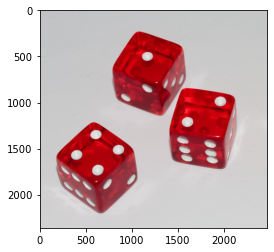

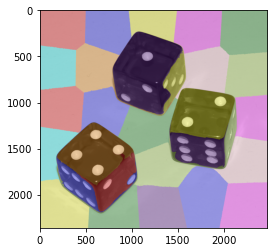

In [29]:
dice_image=plt.imread('dice.jpg')
plt.imshow(dice_image)

segments= slic(dice_image,n_segments=40)

#segmented_image=label2rgb(segments,coins_image,kind='avg')
segmented_image=label2rgb(segments,dice_image)

fig,ax=plt.subplots(figsize=(6,4))
ax.imshow(segmented_image)
plt.show()


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09]


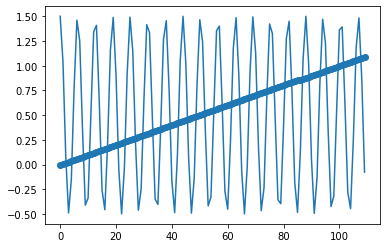

In [33]:
X=np.arange(0,110,1)
Y=np.arange(0,1.1,.01)
print(Y)
plt.scatter(X,Y)

Cosine = np.cos(X) + 0.5
plt.plot(X, Cosine)
plt.show()

In [31]:
import time
import asyncio

class SubscriberDan:
    name=""
    def __init__(self,name):
        self.name=name
        
    async def notificationMethod(self,value):
        print("1{} receive value {} result={}".format(self.name,value, self.do_something(value)))
        
    def do_something(self, value):
        time.sleep(1)
        return (value*value)

class SubscriberBob:
    name=""
    def __init__(self,name):
        self.name=name
        
    async def notificationMethod(self,value):
        print("2{} receive value {} result={}".format(self.name, value, self.do_somethingbob(value)))
        
    def do_somethingbob(self,value):
        time.sleep(2)
        return (value+value)        
    
class MainWorker:
    
    subscribers=[]
    def addSubscriber(self,subscriber):
        self.subscribers.append(subscriber)
        
    def do_somework(self):
        i=0
        while True:
            print(i)
            i=i+1
            if i%2==True:
                self.changeOccurred(self,i)
            if i==10:
                break
                
    def changeOccurred(self,value):
        for subscriber in self.subscribers:
            #asyncio.ensure_future(subscriber.notificationMethod(value))
            asyncio.Task(subscriber.notificationMethod(value))
            
main=MainWorker
subscriberbob= SubscriberBob("bob")
subscriberdan= SubscriberDan("dan")

main.addSubscriber(main,subscriberbob)
main.addSubscriber(main,subscriberdan)
main.do_somework(main)


0
1
2
3
4
5
6
7
8
9
2bob receive value 1 result=2
1dan receive value 1 result=1
2bob receive value 3 result=6
1dan receive value 3 result=9
2bob receive value 5 result=10
1dan receive value 5 result=25
2bob receive value 7 result=14
1dan receive value 7 result=49
2bob receive value 9 result=18
1dan receive value 9 result=81


In [130]:
data={'Col1': ['value11', 'value12', 'value13'],
'Col2': ['value21', 'value22','value23'] ,
'Col3': ['value31', 'value32', 'value33']
}
df=pd.DataFrame(data)
df.reset_index(inplace=True)
print(df)

col1=pd.DataFrame(df['Col1'])
col2=pd.DataFrame(df['Col2'])
col3=pd.DataFrame(df['Col3'])

col1['key'] = 1
col2['key'] = 1
col3['key'] = 1

col1=pd.merge(col1, col2, on ='key')
col1=pd.merge(col1, col3, on ='key').drop("key", 1)

#col1.to_frame().merge(col2.to_frame(), how='cross',left_index=True, right_index=True)
#col1.merge(col3, how='cross',left_index=True, right_index=True)

print(col1)

   index     Col1     Col2     Col3
0      0  value11  value21  value31
1      1  value12  value22  value32
2      2  value13  value23  value33
       Col1     Col2     Col3
0   value11  value21  value31
1   value11  value21  value32
2   value11  value21  value33
3   value11  value22  value31
4   value11  value22  value32
5   value11  value22  value33
6   value11  value23  value31
7   value11  value23  value32
8   value11  value23  value33
9   value12  value21  value31
10  value12  value21  value32
11  value12  value21  value33
12  value12  value22  value31
13  value12  value22  value32
14  value12  value22  value33
15  value12  value23  value31
16  value12  value23  value32
17  value12  value23  value33
18  value13  value21  value31
19  value13  value21  value32
20  value13  value21  value33
21  value13  value22  value31
22  value13  value22  value32
23  value13  value22  value33
24  value13  value23  value31
25  value13  value23  value32
26  value13  value23  value33


In [238]:
s = "There was a cow at home. home=mary cowname=betsy date=10-jan-2013"

d = {}

def add(m):
    d[m.group(1)] = m.group(2)

s = re.sub(r'(\w+)=(\S+)', add, s)
d['theSentence'] = s.strip()

print(d)

#\S one character that is not whitespace

#patternRegex = re.compile(r'[\w\s]+\.{1}')
#patternRegex = re.compile(r'[\w\s]+\.{1}')
#patternRegex = re.compile(r'([\w+\s]+\.{1})|((\s+\w+)=(\S+))')
#all_matches = patternRegex.finditer(s)
s = "There was a cow at home. home=mary cowname=betsy date=10-jan-2013"
all_matches = re.findall(r'([\w+\s]+\.{1})|((\s+\w+)=(\S+))',s)
d={}
for i in np.arange(len(all_matches)):
    #print(all_matches[i])
    if all_matches[i][0] != "":
        d["theSentence"]=all_matches[i][0]
    else:
        d[all_matches[i][2]]=all_matches[i][3]
       
print(d)
#print(all_matches.group(4))
#for match in all_matches:
#    print(match)


{'home': 'mary', 'cowname': 'betsy', 'date': '10-jan-2013', 'theSentence': 'There was a cow at home.'}
{'theSentence': 'There was a cow at home.', ' home': 'mary', ' cowname': 'betsy', ' date': '10-jan-2013'}


In [248]:
dna = ['A','G','C','T']
def generateDNA(N):
    result= [random.choice(dna) for i in np.arange(N)]
    return("".join(result))

print(generateDNA(100))

TTCGCGGACGGTTCATCAGCCCTAGCCGGTTAAGAACTATCGAGCCACCCTAAGAACGGTCCATATTTGGAGTGTTACAACTTTGGATCTTCTACGTTGC


In [273]:
nested_list = [[['list 1'],['list 5']],['list2'],['list3'],['list4'],{'hello':'world'}]

def countLists(nested_list):
    #print(nested_list)
    if len(nested_list)==1 & isinstance(nested_list,list):
        #print("return")
        return 1
    
    count=0
    for alist in nested_list:
            if isinstance(alist, list):
                retCount=countLists(alist)
                count+=retCount
                #print(alist)
    return count
            
countLists(nested_list)

5

In [288]:
my_list = ['I', 'swear', 'I', 'googled', 'first']

def two_words(my_list):
    i=0
    words=[]
    for word in my_list:
        
        words.append(word)
        if i%2:
            #print(word)
            yield (" ".join(words))
            words.clear()
            # Yield the line of data
        i+=1
    if len(words)>0:
        yield (" ".join(words))
        
print(list(two_words(my_list)))


['I swear', 'I googled', 'first']


In [338]:
data=["Houston 69.7 degrees F 2,144,491",
"Hialeah 77.9 degrees F 217,141",
"Miami 77.3 degrees F 404,048",
"Carol City 77.3 degrees F 59,443",
"North Westside 77.3 degrees F 101,285"]

city=[]
temperature=[]
measure=[]
counts=[]

for s in data:
    #print(s)
    all_matches = re.findall(r'([a-zA-Z]+\s*[a-zA-Z]*)|([0-9.,]+)',s)
    city.append(all_matches[0][0])
    temperature.append(all_matches[1][1])
    measure.append(all_matches[2][0])
    counts.append(all_matches[3][1])
    

    
df=pd.DataFrame({'city':city,'temperature':temperature,'measure':measure,'counts':counts})
df['temperature']=df['temperature'].astype('float')
df['counts']=df['counts'].apply(lambda row: int(row.replace(',','')))
print(df.sort_values(by='counts', ascending=False))

             city  temperature    measure   counts
0        Houston          69.7  degrees F  2144491
2          Miami          77.3  degrees F   404048
1        Hialeah          77.9  degrees F   217141
4  North Westside         77.3  degrees F   101285
3      Carol City         77.3  degrees F    59443


In [339]:
a = ['"16','bob','2440', '-2', '34"']

In [350]:
class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.nextval = None
        self.previousval=None

class LinkedList:
    def __init__(self):
        self.headval = None

    def listprint(self):
        node = self.headval
        while node is not None:
            if node.previousval!=None:
                print("Previous Node",node.previousval.dataval)
            else:
                print("Previous Node is None")
            print("CurrentNode", node.dataval)
            print("\n")
            node = node.nextval        
        
        
list1 = LinkedList()
some_list = ["one", "two", "three"]
for item in some_list:
    if list1.headval==None:
        currentNode=Node(item)
        list1.headval = currentNode
        currentNode.previousval=None
        previousNode=currentNode
    else:
        currentNode=Node(item)
        currentNode.previousval=previousNode
        previousNode.nextval=currentNode
        previousNode=currentNode
        
list1.listprint()

Previous Node is None
CurrentNode one


Previous Node one
CurrentNode two


Previous Node two
CurrentNode three




In [35]:
import calendar 
from datetime import datetime  
from datetime import timedelta  

def generateDays(start_date,weeks):
    days=7*weeks
    week = []
    for day in np.arange(days):
        a_date = pd.to_datetime(start_date + timedelta(days=int(day)))
        day_num  = calendar.weekday(a_date.year,a_date.month,a_date.day)
        day_name = calendar.day_name[day_num]
        daydate = { "day_name":day_name,
                "day":a_date.day,
                "month":a_date.month,
                "year":a_date.year,
               }
        week.append(daydate)
    return week    


print(generateDays(date.today(),2))


[{'day_name': 'Wednesday', 'day': 16, 'month': 6, 'year': 2021}, {'day_name': 'Thursday', 'day': 17, 'month': 6, 'year': 2021}, {'day_name': 'Friday', 'day': 18, 'month': 6, 'year': 2021}, {'day_name': 'Saturday', 'day': 19, 'month': 6, 'year': 2021}, {'day_name': 'Sunday', 'day': 20, 'month': 6, 'year': 2021}, {'day_name': 'Monday', 'day': 21, 'month': 6, 'year': 2021}, {'day_name': 'Tuesday', 'day': 22, 'month': 6, 'year': 2021}, {'day_name': 'Wednesday', 'day': 23, 'month': 6, 'year': 2021}, {'day_name': 'Thursday', 'day': 24, 'month': 6, 'year': 2021}, {'day_name': 'Friday', 'day': 25, 'month': 6, 'year': 2021}, {'day_name': 'Saturday', 'day': 26, 'month': 6, 'year': 2021}, {'day_name': 'Sunday', 'day': 27, 'month': 6, 'year': 2021}, {'day_name': 'Monday', 'day': 28, 'month': 6, 'year': 2021}, {'day_name': 'Tuesday', 'day': 29, 'month': 6, 'year': 2021}]


In [9]:
tuples = [('hello', 'my'), ('my', 'name'), ('name', 'is'), ('is', 'bob')]
result=[]
[result.append(k+" "+v) for k,v in tuples]
    
print(result)

['hello my', 'my name', 'name is', 'is bob']


In [13]:
df=pd.DataFrame({"a":[1,2,3,4,5,5,6,7,8,1]})
df.reset_index(inplace=True)
df=df.melt()
print(df)
grouped=df.groupby('value').count()
print(grouped)



   variable  value
0     index      0
1     index      1
2     index      2
3     index      3
4     index      4
5     index      5
6     index      6
7     index      7
8     index      8
9     index      9
10        a      1
11        a      2
12        a      3
13        a      4
14        a      5
15        a      5
16        a      6
17        a      7
18        a      8
19        a      1
       variable
value          
0             1
1             3
2             2
3             2
4             2
5             3
6             2
7             2
8             2
9             1


In [38]:
paragraph="""either the well was very deep, or she fell very slowly, for she had
plenty of time as she went down to look about her and to wonder what was
going to happen next. first, she tried to look down and make out what
she was coming to, but it was too dark to see anything; then she
looked at the sides of the well, and noticed that they were filled with
cupboards and book-shelves; here and there she saw maps and pictures
hung upon pegs. she took down a jar from one of the shelves as
she passed; it was labelled 'orange marmalade', but to her great
disappointment it was empty: she did not like to drop the jar for fear
of killing somebody, so managed to put it into one of the cupboards as
she fell past it."""

sentences=paragraph.split(".")

pattern="\w+\s+((\whe)\s+(\w+el\w+)){1}\s+\w+"
temp=[]
for sentence in sentences:
    result=re.findall(pattern,sentence)
    for item in result:
        print(item)
        temp.append("".join(item[0]).replace(' ',''))
print(temp)        

('the well', 'the', 'well')
('she fell', 'she', 'fell')
('the shelves', 'the', 'shelves')
('she fell', 'she', 'fell')
['thewell', 'shefell', 'theshelves', 'shefell']


In [22]:
whitelist = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','1','2','3','4','5','6','7','8','9','0']

pattern= r"^[a-z,A-Z,0-9\s]+$"

myval="robotic@934"

#cons,args=re.search(pattern,input).groups()
all_matches=re.findall(pattern, myval)
print(all_matches)

['robotic@934']


In [34]:
ID=[ 
123, 
123, 
123, 
456, 
456, 
456, 
456, 
789, 
789] 

domain=['vk.com',
 'vk.com',
 'twitter.com',
 'vk.com',
 'facebook.com',
 'vk.com',
 'google.com',
 'twitter.com',
 'vk.com'
]
df=pd.DataFrame({'id':ID,'domain':domain})
fp=pd.pivot_table(data=df,index='domain',aggfunc=pd.Series.nunique)
print(fp)



              id
domain          
facebook.com   1
google.com     1
twitter.com    2
vk.com         3


In [121]:
data=['flower','flow','flight']
min_length=min([len(x) for x in data])
df=pd.DataFrame(data,columns=['data'])    

results=[]    
for i in range(1,min_length):
    alist=[]
    alist=(df.iloc[0:min_length]['data'].str[0:i])
    
    if len(set(alist))==1:
           results.append(set(alist))
print(max([x.pop() for x in results],key=len))


4
fl


In [251]:
df=pd.DataFrame({'ID': {0: 4, 1: 4, 2: 4, 3: 88, 4: 88, 5: 323, 6: 323},
         'Step': {0: 'A', 1: 'Bar', 2: 'F', 3: 'F', 4: 'Bar', 5: 'F', 6: 'A'},
         'Num': {0: 38, 1: 38, 2: 38, 3: 320, 4: 320, 5: 433, 6: 432},
         'Date': {0: '2018-08-02',
          1: '2018-12-02',
          2: '2019-03-02',
          3: '2017-03-02',
          4: '2018-03-02',
          5: '2020-03-04',
          6: '2020-02-03'},
         'Occurence': {0: 3, 1: 3, 2: 3, 3: 2, 4: 2, 5: 2, 6: 2}})
df.set_index(['ID','Step'],inplace=True)
print(df)
print("If 'Num' is different for the same 'ID', then delete the rows of this ID.")

#exclude id with single occurrences
grouped=df.groupby([df.index.get_level_values(0)]).size().eq(1)
labels=set([x for x,y in (grouped[grouped.values==True].index)])

filter=[x for x in df.index.get_level_values(0) if x not in labels]

# remove ID where Num is unique
grouped=df[df.index.get_level_values(0).isin(filter)].groupby([df.index.get_level_values(0),'Num']).size().eq(1)

labels=set([x for x,y in (grouped[grouped.values==True].index)])
if len(labels)>0:
    df = df.drop(labels=labels, axis=0,level=0)    
print(df)



          Num        Date  Occurence
ID  Step                            
4   A      38  2018-08-02          3
    Bar    38  2018-12-02          3
    F      38  2019-03-02          3
88  F     320  2017-03-02          2
    Bar   320  2018-03-02          2
323 F     433  2020-03-04          2
    A     432  2020-02-03          2
If 'Num' is different for the same 'ID', then delete the rows of this ID.
         Num        Date  Occurence
ID Step                            
4  A      38  2018-08-02          3
   Bar    38  2018-12-02          3
   F      38  2019-03-02          3
88 F     320  2017-03-02          2
   Bar   320  2018-03-02          2


In [261]:
str = "What $noun$ is $verb$?"
new_str=(re.sub('(\$noun\$)', 'ABC',str))
print(new_str)
new_str=(re.sub('(\$verb\$)', 'DEF', new_str))

print(new_str)


dict = {
    "(\$noun\$)" : "ABC",
    "(\$verb\$)": "DEF"
  } 
new_str=str
for key,value in dict.items():
    new_str=(re.sub(key, value, new_str))
print(new_str)

What ABC is $verb$?
What ABC is DEF?
What ABC is DEF?


In [282]:
df = pd.DataFrame(data={'col1': [1,2,3,4,'apple','apple'], 'col2': [3,4,5,6,7,8]})
df.reset_index(inplace=True)
print(df)

grouped=df.col1.str.isnumeric().eq(0)

labels=set([x for x in (grouped[grouped.values==True].index)])
if len(labels)>0:
    df = df.drop(labels=labels, axis=0)    

   index   col1  col2
0      0      1     3
1      1      2     4
2      2      3     5
3      3      4     6
4      4  apple     7
5      5  apple     8


In [305]:
list_of_lists = [['d','b','s'],['e','b','f'],['s','f','l'],['b','l','t']]
for i in range(len(list_of_lists)):
    for j in range(i+1,len(list_of_lists)):
        result=(list_of_lists[i]+list_of_lists[j])
        #print(result)
        counts=(Counter(result))
        matches={x for k,x in counts.items() if x==2}
        if len(matches)==0:
            print("missing a match")

In [341]:
grades =  [
   ['Students', 'Test 1', 'Test 2', 'Test 3'],
   ['Tomas', '100', '90', '80'],
   ['Marcos', '88', '99', '111'],
   ['Flavia', '45', '56', '67'],
   ['Ramon', '59', '61', '67'],
   ['Ursula', '73', '79', '83'],
   ['Federico', '89', '97', '101']
] 
#print(grades[0])
Columns=grades[0]
df=pd.DataFrame(columns=Columns)
for i in range(1, len(grades)):
    df_length = len(df)
    df.loc[df_length] = grades[i]


print(df.to_records())

dict=df.T.to_dict()
for k,v in dict.items():
    print(k,v['Students'])

[(0, 'Tomas', '100', '90', '80') (1, 'Marcos', '88', '99', '111')
 (2, 'Flavia', '45', '56', '67') (3, 'Ramon', '59', '61', '67')
 (4, 'Ursula', '73', '79', '83') (5, 'Federico', '89', '97', '101')]
0 Tomas
1 Marcos
2 Flavia
3 Ramon
4 Ursula
5 Federico


In [23]:
my_list = [[1,2,3],[4,5,6],[7,8,9]]
dictionary = {1: -1, 2: -2, 3: -3,4:-4,5:-5,6:-6,7:-7,8:-8,9:-9}

def replace_all(word_list, dictionary):
    for i, j in dictionary.items():
        for lst in word_list:
            if i in set(lst): 
                print("index",lst.index(i),"replace",j)
                lst[lst.index(i)] = j
        print(word_list)
    return word_list
        
result=replace_all(my_list, dictionary)
print("result",result)


index 0 replace -1
[[-1, 2, 3], [4, 5, 6], [7, 8, 9]]
index 1 replace -2
[[-1, -2, 3], [4, 5, 6], [7, 8, 9]]
index 2 replace -3
[[-1, -2, -3], [4, 5, 6], [7, 8, 9]]
index 0 replace -4
[[-1, -2, -3], [-4, 5, 6], [7, 8, 9]]
index 1 replace -5
[[-1, -2, -3], [-4, -5, 6], [7, 8, 9]]
index 2 replace -6
[[-1, -2, -3], [-4, -5, -6], [7, 8, 9]]
index 0 replace -7
[[-1, -2, -3], [-4, -5, -6], [-7, 8, 9]]
index 1 replace -8
[[-1, -2, -3], [-4, -5, -6], [-7, -8, 9]]
index 2 replace -9
[[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]]
result [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]]


In [77]:
rand = np.random.RandomState(1)
df = pd.DataFrame({'A': ['foo', 'bar', 'baz'] * 2,
                            'B': rand.randn(6),
                            'C': rand.rand(6) > .5})
print(df)
grouped=df.groupby('A')['B'].sum().sort_values(ascending=False)
print(grouped)
print(grouped.index.get_level_values(0))

grouped=df.groupby('A')['B'].transform('sum').sort_values(ascending=False)
print(grouped)

#sort1 = df.ix[grouped[['B']].transform(sum).sort('B').index]

     A         B      C
0  foo  1.624345  False
1  bar -0.611756   True
2  baz -0.528172  False
3  foo -1.072969   True
4  bar  0.865408  False
5  baz -2.301539   True
A
foo    0.551377
bar    0.253651
baz   -2.829710
Name: B, dtype: float64
Index(['foo', 'bar', 'baz'], dtype='object', name='A')
3    0.551377
0    0.551377
4    0.253651
1    0.253651
5   -2.829710
2   -2.829710
Name: B, dtype: float64


In [80]:
data=[[12, 'tall', 'blue', 1],
[2, 'short', 'red', 9],
[4, 'tall', 'blue', 13]]

data=[tuple(x) for x in data]
result = sorted(data, key = lambda x: (x[1], x[2]))
print(result)

[(2, 'short', 'red', 9), (12, 'tall', 'blue', 1), (4, 'tall', 'blue', 13)]


In [118]:
current_dt=datetime.now()
feed_dt = datetime.now()-timedelta(days=3)
from_dt=datetime(year=feed_dt.year,month=feed_dt.month,day=feed_dt.day)
days_elapsed=(current_dt-from_dt).days
print(True if days_elapsed <=3 else False)

True


In [124]:
from threading import Timer

def hello():
    print ("hello, world")

t = Timer(10.0, hello)
t.start() # after 30 seconds, "hello, world" will be printedfrom threading import Timer



hello, world


In [139]:
s = '<textarea id="Foo"></textarea>'
results = re.search(r'(<textarea id=\"Foo\">)*(</textarea>)*', s)
print (results.group(1)+'Bar'+results.group(2))

output = re.sub(r'(<textarea.*>).*(</textarea>)', r'\1Bar\2', s)
print(output)

<textarea id="Foo">Bar</textarea>
<textarea id="Foo">Bar</textarea>


In [169]:
string="foo,bar,qux,garp,wobble,thud"
results=re.search('(garp)',string)
print(results.group(0))


garp


In [196]:
import math
equation = "12*math.sqrt(13)/15"
results=re.search("([0-9]*).*\(([0-9]*)\)\/([0-9]*)",equation)
factor=results.group(1)
numerator=results.group(2)
denominator=results.group(3)
print("factor",factor,"numerator",numerator,"denominator",denominator)

x=eval(equation)
print(x)

factor 12 numerator 13 denominator 15
2.884441020371191


In [216]:
from random import seed
from random import choice

seed(123)
sequence = [i for i in range(1,101,1)]
#print(sequence)
mylst=[]
for _ in range(5):
    selection = choice(sequence)
    mylst.append(selection)

print(mylst)    
print("Min value",min(mylst))

[7, 35, 12, 99, 53]
Min value 7


In [39]:
phrase = " hello world Deleted,Undeleted,Read in a sentence"
results=re.search("(Read|Deleted|Undeleted).*(Read|Deleted|Undeleted).*(Read|Deleted|Undeleted).*", phrase).groups()
for group in results:
    print(group)

Deleted
Undeleted
Read


In [23]:
phrase = " / hello world / "


results=re.search("\s*\/\s*([a-z\s+]*)\s*\/\s*", phrase)
print(results.group(1))

hello world 


In [64]:
name = ['I love ','I have ','I hate ','I want ','I buy ','I like ','I see ']
second = ['banana','lemon','water','cat','soap','woman','shopping','pen','mouse']

#result=list(zip(name,second))
#print(result)
result=[]
#[result.append(random.sample(name,1)[0]+random.sample(second,1)[0]) for i in range(10)]
#print(result)
for i in range(10):
    a_num=random.sample(range(10000),1)
    if a_num[0]%2:
        result.append(random.sample(name,1))
    else:
        result.append(random.sample(second,1))
print(result)

[['mouse'], ['I see '], ['banana'], ['cat'], ['I buy '], ['soap'], ['woman'], ['I like '], ['soap'], ['cat']]


In [72]:
A = [(10, 50, 1), (20, 4, 100), (11, 21, 10), (1, 42, 60), (0, 7, 74)]
indices = [1, 2]

for i in range(3):
    col=[]
    for index in indices:
        col.append(A[index][i])
    print(max(col))

20
21
100


In [119]:
#https://www.geeksforgeeks.org/python-convert-list-tuples-dictionary/
    
d1 = {'Name':['ABC'], 'Number':['123'], 'Element 1':['1', '2', '3'],
      'Element2':['1','2','3']}

def Convert(tup, di):
    for a, b in tup:
        #di.setdefault(a,[]).append(b)
        di[a]=b
    return di

dict={}
listElements=[]
for key,value in d1.items():
    if isinstance(value,list) and len(value)>1:
        for item in value:
            listElements.append((key,item))
    elif isinstance(value,list) and len(value)==1:
        dict[key]=value[0]
    else:
        dict[key]=value
        
dict['Elements']=[Convert([(x,y)],{})  for x,y in listElements]
print(dict)    




    
    


{'Name': 'ABC', 'Number': '123', 'Elements': [{'Element 1': '1'}, {'Element 1': '2'}, {'Element 1': '3'}, {'Element2': '1'}, {'Element2': '2'}, {'Element2': '3'}]}


In [11]:
a={'name':[]}
a['name'].append('el1')
print(a)

a={}

if 'name' not in a.keys():
    a['name']=[]

a['name'].append('el1')
    
print(a)
    

{'name': ['el1']}
{'name': ['el1']}


In [87]:
line1 = '-0.9821 1:15 2:20 4:10 8:10'
line2 = '0.1235 1:15 2:20 6:10 10:10'
line3 = '0.2132 1:15 3:20 5:10 9:10'
line4 = '0.328 2:15 4:20 6:10 7:12 8:16 10:10'
line5 = '0.973 2:15 3:20 6:10 8:12 9:10'

data=[line1,line2,line3,line4,line5]

sparseMatrix = csr_matrix((5, 15), 
                          dtype = np.float).toarray()
row=0
for item in data:
    for entry in item.split(' '):
        if ':' in entry:
            index,value = entry.split(':')
            sparseMatrix[row,int(index)]=value
        else:
            sparseMatrix[row,0]=entry
    row+=1
    
  
#Print the sparse matrix
#print(sparseMatrix)    

X=sparseMatrix[:,1:15]
y=(sparseMatrix[:,0]*10).astype(int)
print(y)
print(X)

knn=KNeighborsClassifier(algorithm='auto',
                         leaf_size=10,
                         metric='minkowski',
                         metric_params=None,
                         n_jobs=1,
                         n_neighbors=3,
                         p=2,
                         weights='uniform')

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=21)
knn.fit(X_train,y_train)

train_accuracy = knn.score(X_train, y_train)
test_accuracy=knn.score(X_test,y_test)
print(train_accuracy,test_accuracy)

for item in X:
    prediction=knn.predict([item])
    print(item,prediction)

y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))    

[-9  1  2  3  9]
[[15. 20.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [15. 20.  0.  0.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.]
 [15.  0. 20.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0. 15.  0. 20.  0. 10. 12. 16.  0. 10.  0.  0.  0.  0.]
 [ 0. 15. 20.  0.  0. 10.  0. 12. 10.  0.  0.  0.  0.  0.]]
0.25 0.0
[15. 20.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.] [-9]
[15. 20.  0.  0.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.] [-9]
[15.  0. 20.  0. 10.  0.  0.  0. 10.  0.  0.  0.  0.  0.] [-9]
[ 0. 15.  0. 20.  0. 10. 12. 16.  0. 10.  0.  0.  0.  0.] [-9]
[ 0. 15. 20.  0.  0. 10.  0. 12. 10.  0.  0.  0.  0.  0.] [-9]
[[0 0]
 [1 0]]
              precision    recall  f1-score   support

          -9       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
stats = {'node100': {'load_1min': '0.58'}, 'node200': {'load_1min': '0.64'}, 'node28': {'load_1min': '0.69'}}
alist=[[float(value2) for item2, value2 in value.items()] for key,value in stats.items()]
results_val=(min(alist),max(alist))
print(results_val)

([0.58], [0.69])


In [13]:
equation="p0*x+p1**2+p3+1"
mydict={'p0': -1.0, 'p1': -9.73133548174993, 'p2': 0.0306594941614714, 'p3': 2.0, 'p4': 0.514879452523938}

for k,v in mydict.items():
    equation=re.sub(str(k),str(v),equation)

print(equation)    
    

-1.0*x+-9.73133548174993**2+2.0+1


In [16]:
arr=np.array([[9.88945457e-01, 1.12012004e-11, 1.10545428e-02],
       [3.19212970e-03, 9.60482604e-01, 3.63252661e-02],
       [9.97873928e-01, 1.10315885e-12, 2.12607185e-03],
       [5.13391890e-07, 9.84294588e-01, 1.57048982e-02]])

result=[max(item)  for item in arr]
print(result)

[0.988945457, 0.960482604, 0.997873928, 0.984294588]


In [18]:
func = lambda x,y: x**2 + y**2
x = [2.9326170613860096, 1.8654993478646646, 2.878679040963291, 1.2534822780679544, 
2.9724667148405075]
y = [3.7757464252380686, 1.1428831196926126, 2.107894507044161, 1.8353208404114492, 
3.868876505529935]

print(list(map(func,x,y)))

[22.856503896430368, 4.786269642161807, 12.73001227370828, 4.9396204086790165, 23.80376378587624]


In [25]:
my_list=['Value today is great weather.','Value final dataset.','Value for money.']

for i in range(len(my_list)):
    my_list[i]=re.sub('^Value ','',my_list[i])

print(my_list)

['today is great weather.', 'final dataset.', 'for money.']


In [3]:
data = {
    'col1':[11,11,11,22,22,33,33],
    'col2':['a','b','c','a','b','a','b']
}
df = pd.DataFrame(data)
df['rnk']=df.groupby('col1')['col2'].cumcount()+1

print(df)

   col1 col2  rnk
0    11    a    1
1    11    b    2
2    11    c    3
3    22    a    1
4    22    b    2
5    33    a    1
6    33    b    2
